In [ ]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import random
import argparse

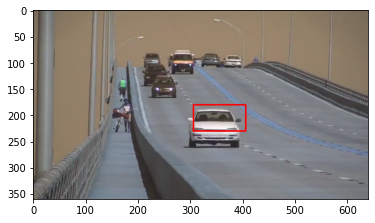

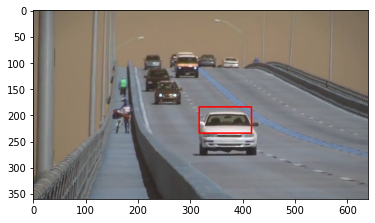

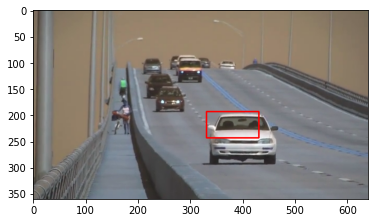

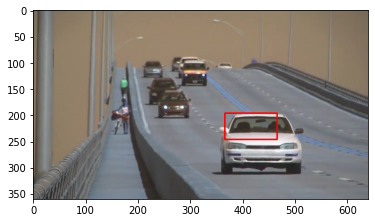

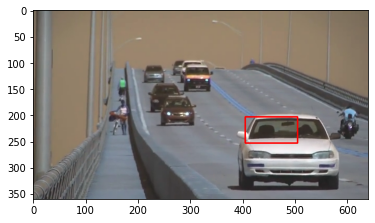

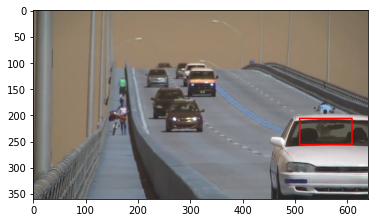

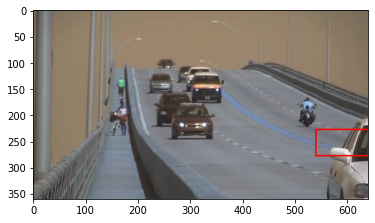

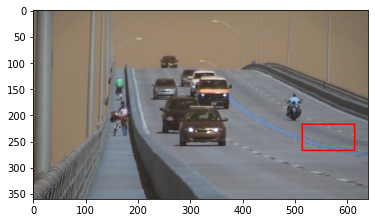

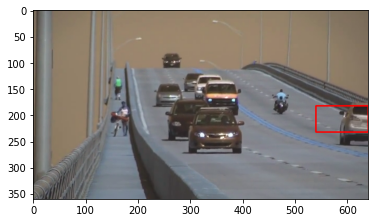

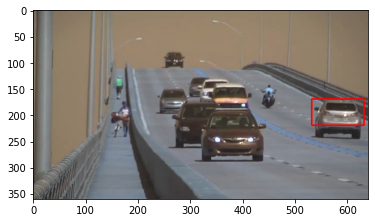

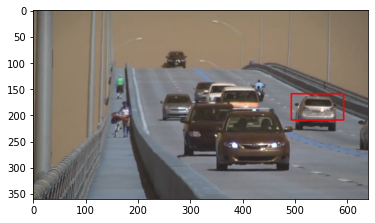

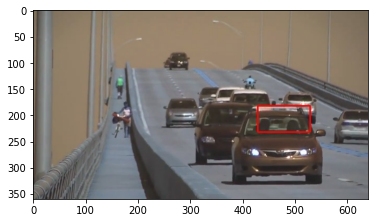

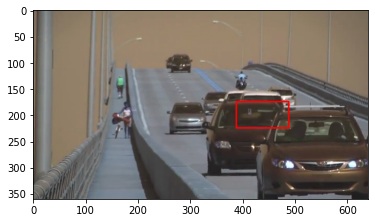

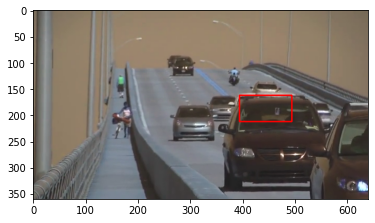

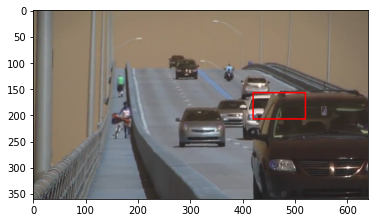

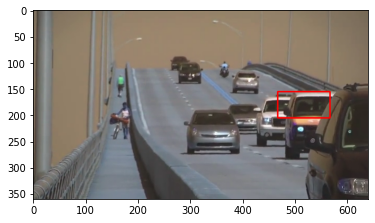

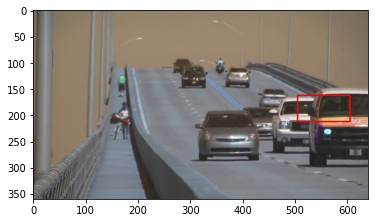

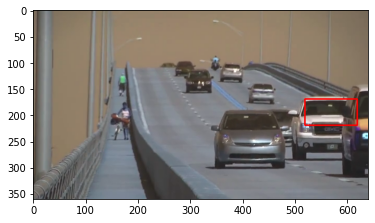

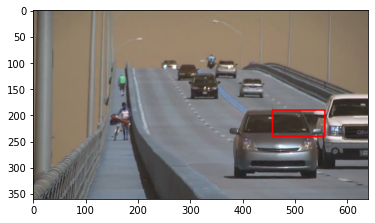

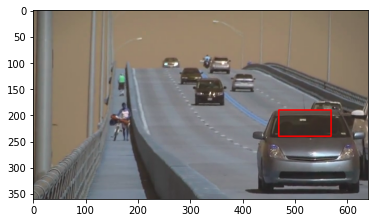

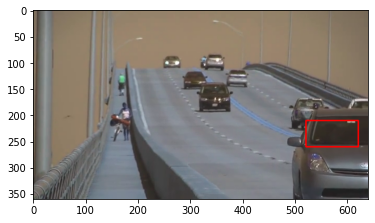

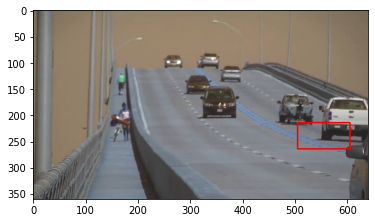

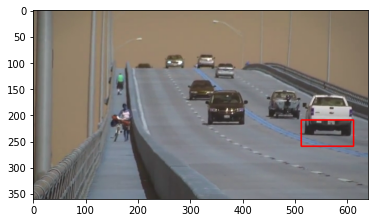

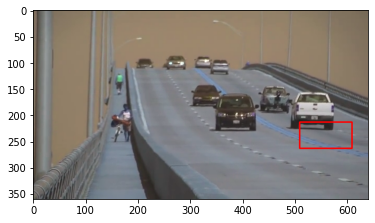

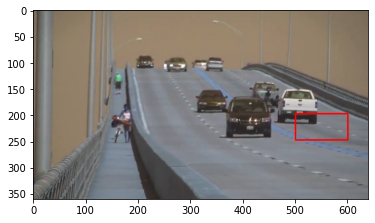

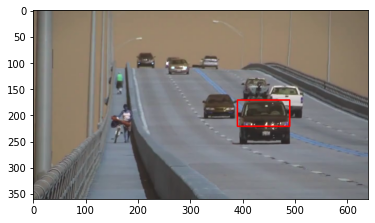

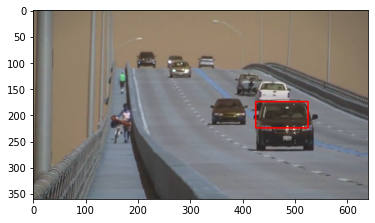

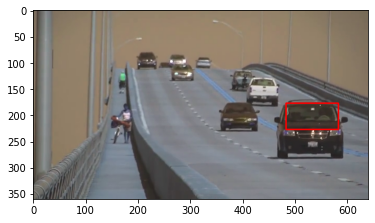

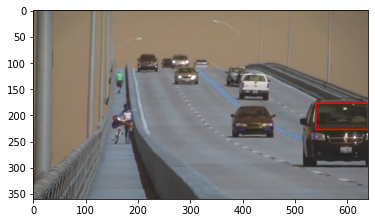

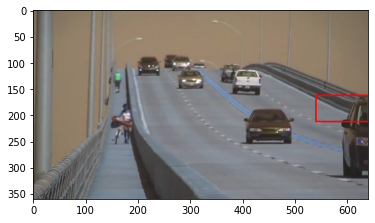

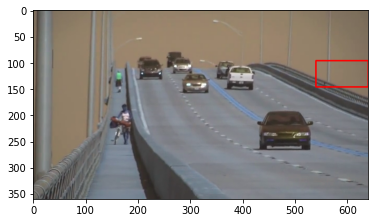

In [ ]:
#parser = argparse.ArgumentParser(description='This sample demonstrates the meanshift algorithm. \
                                              #The example file can be downloaded from: \
                                              #https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4')
#parser.add_argument('image', type=str, help='path to image file')
#args = parser.parse_args()
cap = cv.VideoCapture('./slow_traffic_small.mp4')
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
x, y, w, h = 300, 200, 100, 50 # simply hardcoded the values
track_window = (x, y, w, h)
# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
# variable to avoid showing many frames
frame_count = 0
while(1):
    ret, frame = cap.read()
    if ret == True and (frame_count % 30) == 0:
        frame_count += 1
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        plt.imshow(img2)
        plt.show()
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    elif ret == True and (frame_count % 30) != 0:
      frame_count += 1
    else:
      break